<a href="https://colab.research.google.com/github/VeereshElango/vs3-cnn-labs/blob/main/FastAI_Vision_HighLevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%%capture
# FOR COLAB: uncomment and run the following code every time you are starting the session
!pip install kornia
!pip install timm

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns
import torch
torch.set_num_threads(1)
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv
import kornia as K
from tqdm import tqdm_notebook as tqdm
from time import time

def imshow_torch(tensor,figsize=(8,6), *kwargs):
    plt.figure(figsize=figsize)
    plt.imshow(K.tensor_to_image(tensor), *kwargs)
    return

def imshow_torch_channels(tensor, dim = 1, *kwargs):
    num_ch = tensor.size(dim)
    fig=plt.figure(figsize=(num_ch*5,5))
    tensor_splitted = torch.split(tensor, 1, dim=dim)
    for i in range(num_ch):
        fig.add_subplot(1, num_ch, i+1)
        plt.imshow(K.tensor_to_image(tensor_splitted[i].squeeze(dim)), *kwargs)
    return

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from fastai.vision.all import *

In [ ]:
path = "/content/drive/MyDrive/Vs3ClassificationTaskDataset"

In [ ]:
files = get_image_files(path)

In [ ]:
def label_func(f): 
    return str(f).split("/")[5]

In [ ]:
dls = ImageDataLoaders.from_path_func(
    path, 
    files,
    label_func, 
    item_tfms=RandomResizedCrop(128, min_scale=0.35), 
    batch_tfms=Normalize.from_stats(*imagenet_stats))

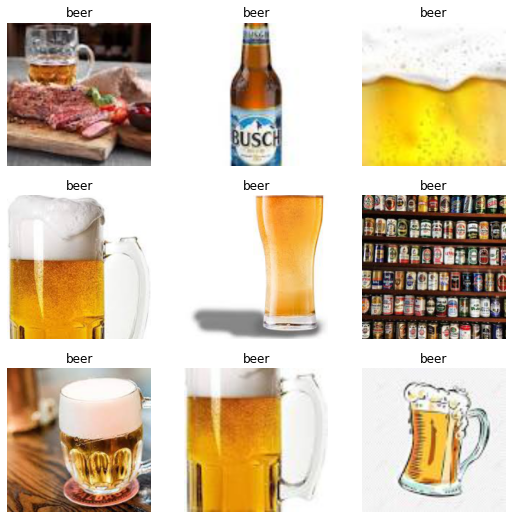

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.904659,0.295436,0.161290,01:05


epoch,train_loss,valid_loss,error_rate,time
0,0.475401,0.149902,0.096774,01:12
1,0.379336,0.112874,0.080645,01:14
2,0.321661,0.121066,0.064516,01:21
3,0.243891,0.100299,0.048387,01:13
4,0.194197,0.094813,0.048387,01:22


In [ ]:
preds, y, losses = learn.get_preds(with_loss=True)

interp = ClassificationInterpretation.from_learner(learn)

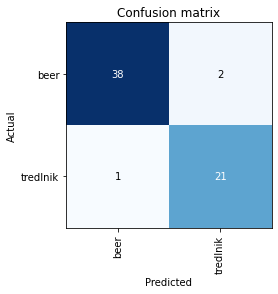

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
arch_name =  'ab.tar.gz'
dir_name ='cd'
!rm -rf test3
!mkdir test3 && cd test3 && wget http://cmp.felk.cvut.cz/~mishkdmy/{dir_name}/{arch_name}
!cd test3 && tar -xzf {arch_name}

--2022-07-29 11:36:21--  http://cmp.felk.cvut.cz/~mishkdmy/cd/ab.tar.gz
Resolving cmp.felk.cvut.cz (cmp.felk.cvut.cz)... 147.32.84.2
Connecting to cmp.felk.cvut.cz (cmp.felk.cvut.cz)|147.32.84.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1238608 (1.2M) [application/x-gzip]
Saving to: ‘ab.tar.gz’

ab.tar.gz           100%[===================>]   1.18M  --.-KB/s    in 0.1s    

2022-07-29 11:36:21 (12.4 MB/s) - ‘ab.tar.gz’ saved [1238608/1238608]



('tredlnik', TensorBase(1), TensorBase([0.1919, 0.8081]))


('beer', TensorBase(0), TensorBase([0.9945, 0.0055]))


('beer', TensorBase(0), TensorBase([0.6366, 0.3634]))


('beer', TensorBase(0), TensorBase([0.5927, 0.4073]))


('beer', TensorBase(0), TensorBase([0.9747, 0.0253]))


('tredlnik', TensorBase(1), TensorBase([0.0026, 0.9974]))


('tredlnik', TensorBase(1), TensorBase([0.0106, 0.9894]))


('tredlnik', TensorBase(1), TensorBase([8.3152e-05, 9.9992e-01]))


('tredlnik', TensorBase(1), TensorBase([0.0937, 0.9063]))


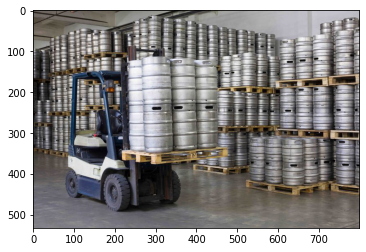

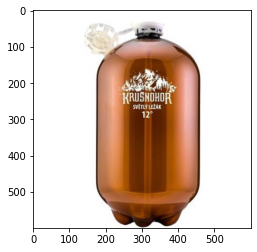

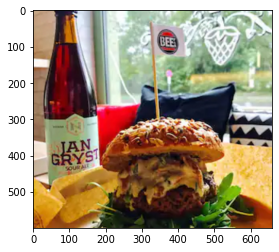

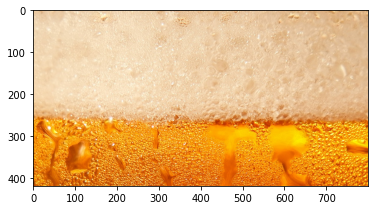

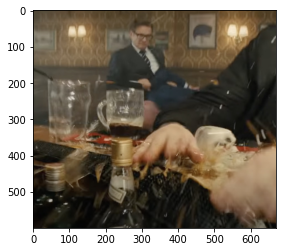

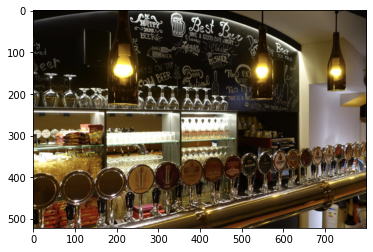

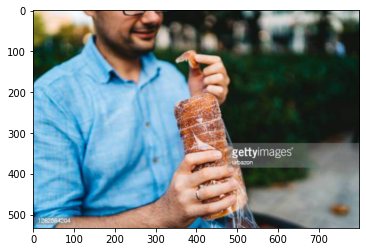

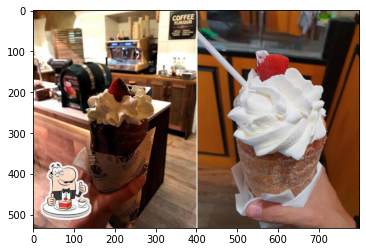

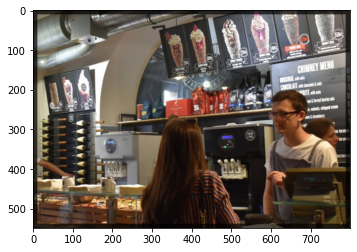

In [ ]:
import os
fnames = sorted([os.path.join('test3', x) for x in os.listdir('test3') if x.endswith('.jpg')])
for f in fnames:
    img=PILImage(load_image(f))
    pred = learn.predict(img)
    print (pred)
    plt.figure()
    plt.imshow(img)